## Logistic Regression

Logistic regression uses the logit function to relate a binary dependent variable (e.g., success/failure, yes/no) to one or more independent variables (e.g., age, income, etc.).

It is a common supervised learning model used for binary classification, and at a high level it works like so:

1. Input features, usually in the form of a vector or a matrix commonly given the variable name X, are matched with a single intercept parameter and an additional parameter per feature.

2. A prediction with these parameters is made using a dot product; the output of this dot product is then passed to a sigmoid function, which converts each output to a probability between zero and one.

3. The output from the sigmoid function is then passed to an algorithm such as Stochastic Gradient Descent, which adjusts the parameters to reduce an error function, usually log loss (also known as binary cross-entropy loss).

4. Perform step three for n number of iterations.

You can see how this is model is used with the data set below:

In [53]:
from sklearn.datasets import load_wine
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.97
Confusion Matrix:
[[25  0  0]
 [ 1 38  1]
 [ 0  1 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.97      0.95      0.96        40
           2       0.96      0.96      0.96        24

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



## Foundational Concepts

### Odds
Odds are calcuated as p/(1-p), for instance the odds of getting a heads when flipping a coin are 1:1 or .5/(1-.5) = .5/.5

### Logit
The Logit function just passes the odds formula from above to a natural logarithm. 

### Natural Logarithm
The natural logarithm of a number 𝑥 is the power to which 𝑒 must be raised to equal x. Mathematically, it can be expressed as:

$$\ln(x) = y \iff e^y = x$$

Base e: The natural logarithm uses the base e, which is an irrational number approximately equal to 2.71828. The number e is known as Euler's number and is the base of natural exponential functions.


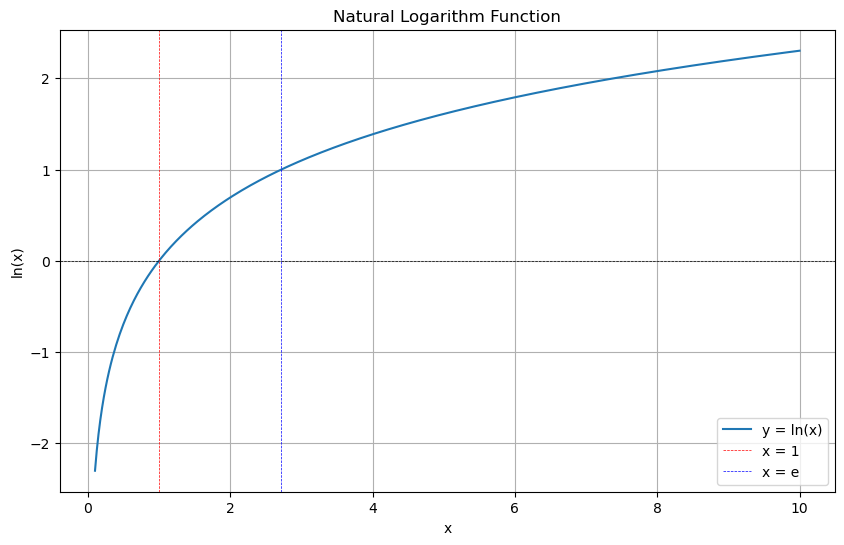

In [56]:
# Define a range of x values
x = np.linspace(0.1, 10, 400)
y = np.log(x)

# Plot the natural logarithm function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = ln(x)')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('Natural Logarithm Function')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(1, color='red', linewidth=0.5, linestyle='--', label='x = 1')
plt.axvline(np.e, color='blue', linewidth=0.5, linestyle='--', label='x = e')
plt.legend()
plt.grid(True)
plt.show()

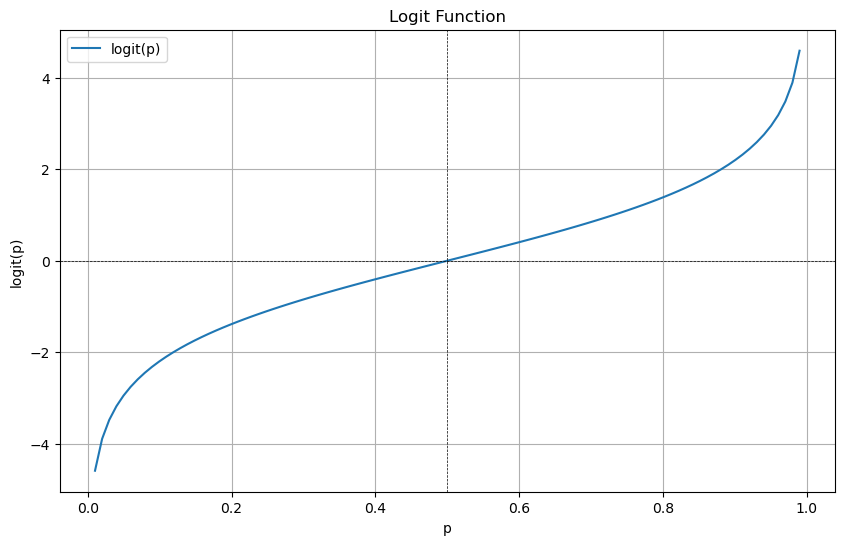

In [57]:
def logit(p):
    return np.log(p / (1 - p))

p = np.linspace(0.01, 0.99, 100)  # Avoiding 0 and 1 to prevent division by zero
logit_values = logit(p)

plt.figure(figsize=(10, 6))
plt.plot(p, logit_values, label='logit(p)')
plt.xlabel('p')
plt.ylabel('logit(p)')
plt.title('Logit Function')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0.5, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.show()

# Custom Logistic Regression Program


 This is the dot product of our input data and our parameters.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

 This is the dot product converted to the odds of a binary class via sigmoid. This will always be between zero and one
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]

 These are updated parameters based on the gradient descent.
[0.0002     0.00769371 0.00999744]

 This

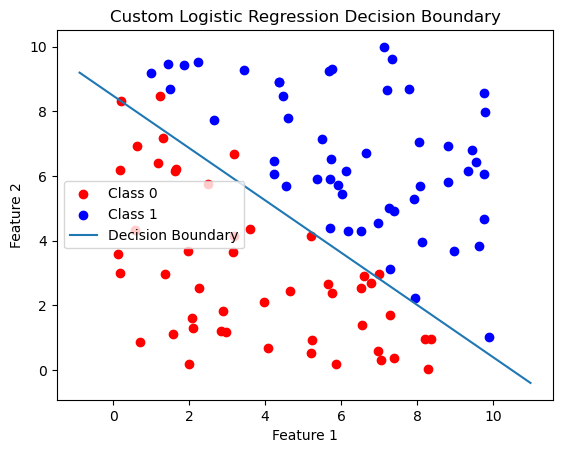

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient
            if _ % 1000 == 0:
                print('\n This is the dot product of our input data and our parameters.')
                print(z)
                print('''\n This is the dot product converted to the odds of a binary class via sigmoid. This will always be between zero and one''')
                print(h)
                print('''\n These are updated parameters based on the gradient descent.''')
                print(self.theta)

    def predict_proba(self, X):
        return sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

# Generate synthetic data
np.random.seed(0)
num_samples = 100
X = np.random.rand(num_samples, 2) * 10  # Features
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Labels

# Add intercept term to X
X = np.hstack((np.ones((num_samples, 1)), X))

# Train the custom logistic regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=10000)
model.fit(X, y)

# Plot the data points
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class 1')

# Plot the decision boundary
x_values = [np.min(X[:, 1] - 1), np.max(X[:, 2] + 1)]
y_values = -(model.theta[0] + np.dot(model.theta[1], x_values)) / model.theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Custom Logistic Regression Decision Boundary')
plt.legend()

# Display the plot
plt.show()